In [1]:
import os
os.chdir("/content/drive/MyDrive/phd/datasets")

In [2]:
os.listdir()

['altmann',
 'Unbalanced.ipynb',
 '.DS_Store',
 'test',
 'unbalanced',
 'fake',
 'tcga',
 'cancers',
 'merged',
 'gtex',
 'data_Grosselin2019.tar',
 'data_medulloblastoma.tar']

In [4]:
!tar -xf data_medulloblastoma.tar

In [7]:
os.chdir("data_medulloblastoma/")
os.listdir()

['res_group_snf.txt',
 'matrix_rnaseq_log2_rpkm.txt',
 'matrix_proteome_log2ratio.txt',
 'matrix_mirna_log2_cpm.txt']

In [6]:
import pandas as pd

In [31]:
df_files = pd.read_csv("res_group_snf.txt", sep="\t", index_col=1).drop("ID", axis=1)
df_files.head(2)

,group_snf,group_bio
Sample,,
MB01,G3,Group_3
MB02,G3,Group_3


In [21]:
for file, sep in zip(['matrix_rnaseq_log2_rpkm.txt', 'matrix_mirna_log2_cpm.txt', 'matrix_proteome_log2ratio.txt'], ["\t", " ", "\t"]):
    df = pd.read_csv(file, sep = sep)
    print(df.shape)
    print(df.head(2))

(33680, 40)
  GeneID      MB01      MB02      MB03  ...     MT229    MT2381     MT314     MT435
0    7SK -0.990409 -1.109097 -0.592830  ...  1.390244 -0.017588  0.329675 -0.002342
1   A1BG  0.896528  0.686093  1.035708  ...  0.616518  0.236511 -2.143220  1.080767

[2 rows x 40 columns]
(1389, 30)
                     MB02      MB06      MB07  ...    MT1377    MT1402    MT2381
hsa-miR-1302     0.270606 -0.124317  0.482669  ... -2.626445  1.581002  0.287568
hsa-miR-200a-5p -1.350021 -5.035224 -2.147153  ... -1.769113  2.430018 -1.367651

[2 rows x 30 columns]
(3892, 39)
  GeneID      MB01      MB02      MB03  ...    MT1364    MT1377    MT1402    MT2381
0  CNOT1  0.188263  0.754668  0.353145  ...  0.427106  0.312634  0.272020  0.064307
1    FTO  1.193973  1.686337  1.186822  ...  0.924829  0.542760  1.144114  1.460988

[2 rows x 39 columns]


In [122]:
df = pd.read_csv('matrix_rnaseq_log2_rpkm.txt', sep="\t", index_col=0)
df.head(2)

,MB01,MB02,MB03,MB04,MB05,MB06,MB07,MB08,MB09,MB13,MB14,MB15,MB16,MB17,MB19,MB20,MB22,MB24,MB25,MB30,MB31,MB34,MB36,MB38,MB39,MB40,MB41,MB42,MB43,MT1179,MT1219,MT1364,MT1377,MT1402,MT161,MT229,MT2381,MT314,MT435
GeneID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7SK,-0.990409,-1.109097,-0.592830,-0.568704,-1.348467,-0.680771,-0.881135,-0.557359,-0.134183,-0.099833,0.188300,0.226385,-0.881494,-0.197363,0.213329,-0.605222,-0.656212,-1.075870,-0.889164,-0.023337,-0.179134,-0.213358,0.899995,-0.708085,-0.224685,-0.169298,0.429139,0.473631,0.034018,0.695709,0.846441,0.596697,0.517366,0.094587,0.703411,1.390244,-0.017588,0.329675,-0.002342
A1BG,0.896528,0.686093,1.035708,-0.053353,-0.513483,0.892065,-1.593642,-2.704498,-0.178979,-3.288431,1.692802,-1.012924,-3.935885,-2.715505,0.192535,-0.509798,-3.352926,0.752637,0.517840,1.191291,1.676940,1.492135,0.704288,0.931766,-2.224284,0.839847,-2.809499,-0.419071,0.864097,1.460045,1.229096,1.637902,0.774924,0.741031,-0.118815,0.616518,0.236511,-2.143220,1.080767


In [123]:
df_files.columns

Index(['group_snf', 'group_bio'], dtype='object')

In [124]:
df_files["group_snf"].unique()

array(['G3', 'G2', 'G4', 'G1'], dtype=object)

In [26]:
!python3 -m pip install scanpy > /dev/null &2>$1
import scanpy as sc

In [125]:
adata = sc.AnnData(X = df.transpose(),
                   obs = df_files.reindex(index=df.columns))

In [126]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


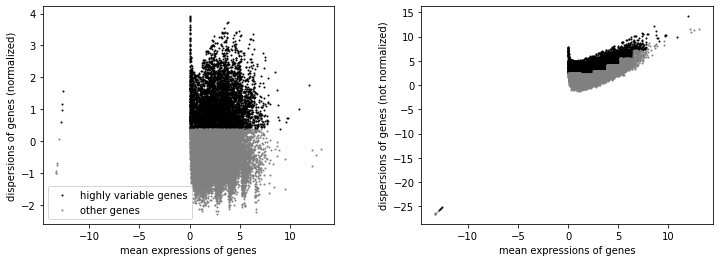

In [127]:
sc.pl.highly_variable_genes(adata)

In [128]:
hvg = adata.var[adata.var["highly_variable"]==True].index

In [129]:
df_mirna = pd.read_csv("matrix_mirna_log2_cpm.txt", sep=" ")
df_mirna.head(2)

,MB02,MB06,MB07,MB08,MB09,MB14,MB17,MB19,MB20,MB22,MB24,MB25,MB30,MB31,MB36,MB38,MB39,MB40,MB41,MB42,MB43,MT161,MT229,MT314,MT1179,MT1219,MT1364,MT1377,MT1402,MT2381
hsa-miR-1302,0.270606,-0.124317,0.482669,0.726469,1.507771,-1.634461,0.098514,-1.601710,0.162111,1.402968,-0.940158,-0.675822,-0.195252,0.305092,-2.658988,1.711631,2.074101,-0.882260,-1.053426,-2.188212,0.607488,-5.035224,-0.377238,0.086898,-2.053639,-0.117955,-0.348202,-2.626445,1.581002,0.287568
hsa-miR-200a-5p,-1.350021,-5.035224,-2.147153,-2.174195,-5.035224,-2.503949,-1.934312,-1.061959,-0.150020,-5.035224,-1.327327,-1.226063,0.463805,0.711199,1.371382,-2.730492,-1.101763,-5.035224,-3.049767,-1.671685,-1.536023,0.725955,-1.852211,-2.304522,-2.053639,-5.035224,-1.293255,-1.769113,2.430018,-1.367651


In [130]:
df = df.reindex(index=hvg).append(df_mirna).dropna(how="any", axis=1, thresh=2000)
print(df.shape)
df.head(2)

(6389, 39)


,MB01,MB02,MB03,MB04,MB05,MB06,MB07,MB08,MB09,MB13,MB14,MB15,MB16,MB17,MB19,MB20,MB22,MB24,MB25,MB30,MB31,MB34,MB36,MB38,MB39,MB40,MB41,MB42,MB43,MT1179,MT1219,MT1364,MT1377,MT1402,MT161,MT229,MT2381,MT314,MT435
A4GALT,-1.375557,-1.369032,-2.076134,3.733788,3.119781,2.282472,-2.919883,-0.258330,-1.712911,-2.201716,-1.861988,-1.770693,-2.419762,-1.079917,-0.494469,-3.125460,-3.836503,2.682481,1.356888,-3.093953,0.472477,-3.396965,3.491340,-4.051775,-2.305147,2.302533,-0.733994,-1.303775,2.473286,-1.674250,-1.776044,-1.295461,-2.041417,-1.887505,2.880484,-2.346144,2.298858,-2.860295,2.685947
AACSP1,-1.898952,-0.465422,-2.561315,-13.287712,-3.212795,-3.416457,-13.287712,-6.056222,-3.296928,-6.278600,-4.082459,-3.676230,-2.557191,-4.077781,-4.550181,-2.836182,-4.572097,-1.245786,-1.792417,-3.456176,-2.111963,-3.396965,-5.686098,-1.594304,-5.997048,-2.151599,-1.733757,-4.108995,-1.075204,-3.994337,4.484480,-5.459379,-5.358010,-1.887505,-3.177125,-0.992951,-2.149837,-4.665031,-3.486386


# Model

In [89]:
!echo "deb https://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25 > /dev/null &2>$1
!apt-get update > /dev/null &2>$1 && apt-get install python3-graph-tool --yes > /dev/null &2>$1
!cd ../../ && git clone https://github.com/fvalle1/trisbm.git

gpg: key 612DEFB798507F25: "Tiago de Paula Peixoto <tiago@skewed.de>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:52
W: Target Packages (main/binary-all/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:52
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:52
W: Target Packages (main/binary-all/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:52
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:52
W: Target Packages (main/binary-all/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:52


In [131]:
import sys
sys.path.append("/content/drive/My Drive/phd/trisbm")

In [132]:
from trisbm.trisbm import trisbm

In [133]:
model = trisbm()

In [134]:
model.make_graph(df.applymap(lambda rpkm: 2**rpkm -1 ), get_kind=lambda g: 2 if "hsa" in g else 1)

Saving level 1
Saving level 0
trisbm/
trisbm/trisbm_level_1_topics.csv
trisbm/trisbm_level_1_topic-dist.csv
trisbm/trisbm_level_1_metadata.csv
trisbm/trisbm_level_1_metadatum-dist.csv
trisbm/trisbm_level_1_clusters.csv
trisbm/trisbm_level_1_word-dist.csv
trisbm/trisbm_level_1_keyword-dist.csv
trisbm/trisbm_level_1_topics.tsv
trisbm/trisbm_level_1_metadata.tsv
trisbm/mat_1.png
trisbm/trisbm_level_0_topics.csv
trisbm/trisbm_level_0_topic-dist.csv
trisbm/trisbm_level_0_metadata.csv
trisbm/trisbm_level_0_metadatum-dist.csv
trisbm/trisbm_level_0_clusters.csv
trisbm/trisbm_level_0_word-dist.csv
trisbm/trisbm_level_0_keyword-dist.csv
trisbm/trisbm_level_0_topics.tsv
trisbm/trisbm_level_0_metadata.tsv
trisbm/mat_0.png
trisbm/summary.txt


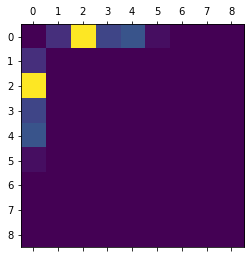

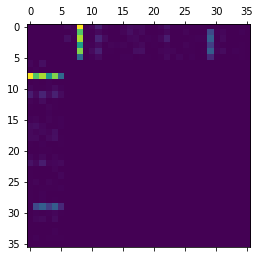

In [138]:
model.fit(n_init=3, verbose=True)
!rm -rf trisbm
!mkdir -p trisbm
os.chdir("trisbm")
model.save_data()
os.chdir("../")
!tar -cf trisbm.tar trisbm/

In [121]:
df_files.to_csv("files.dat")